### Introduction to Computer Vision (Fall 2022)
Instructor: Muhammad Fahim \\
TA: Batoul Yaseen, Karam Almaghout


### Acknowledgement
This lab was maintained by Rauf, Marcus, Rufina, Alex, Batoul, Karam and Fahim \\

## Lab Objectives
Descriptors, Detectors

## Import libraries, download images

In [1]:
from IPython.display import clear_output
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16
clear_output()

In [2]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# remove grid lines
import numpy as np
import time
import cv2

## Download images

In [3]:
!wget https://сезоны-года.рф/sites/default/files/images/shkolnikam/gora.jpg -O mountains.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/mouse.jpg?raw=true -O mouse.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/mouse_scene.jpg?raw=true -O mouse_scene.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/panorama1.jpg?raw=true -O panorama1.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/panorama2.jpg?raw=true -O panorama2.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/book.jpg?raw=true -O book.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/book_scene.jpg?raw=true -O book_scene.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/book_scene_2.jpg?raw=true -O book_scene_2.jpg
clear_output()

## Helper functions

In [4]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result

    
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

## Harris corner detector

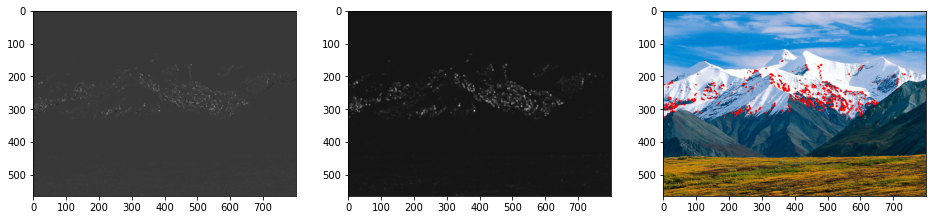

In [5]:
mountains_img = read_and_resize('mountains.jpg')

gray = cv2.cvtColor(mountains_img,cv2.COLOR_RGB2GRAY)

# cv.cornerHarris(src, blockSize, ksize, k)
# blockSize	Neighborhood size.
# ksize	Aperture parameter for the Sobel operator.
corners = cv2.cornerHarris(gray,3,3,0.04)

# Dilate responses to make them more visible (only needed for visualization!)
dest = cv2.dilate(corners, None) 
  
# Color pixels in the original image red, where
# the Harris response is above a given threshold
mountains_img[dest > 0.1 * dest.max()]=[255, 0, 0] 

    
showInRow([corners, dest, mountains_img])

## Exercise: Implement Harris corner detector

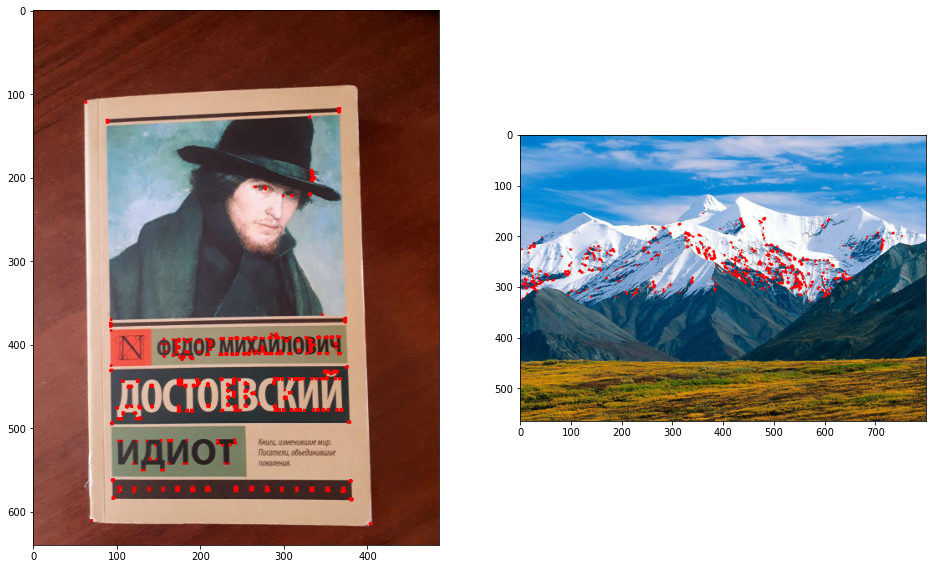

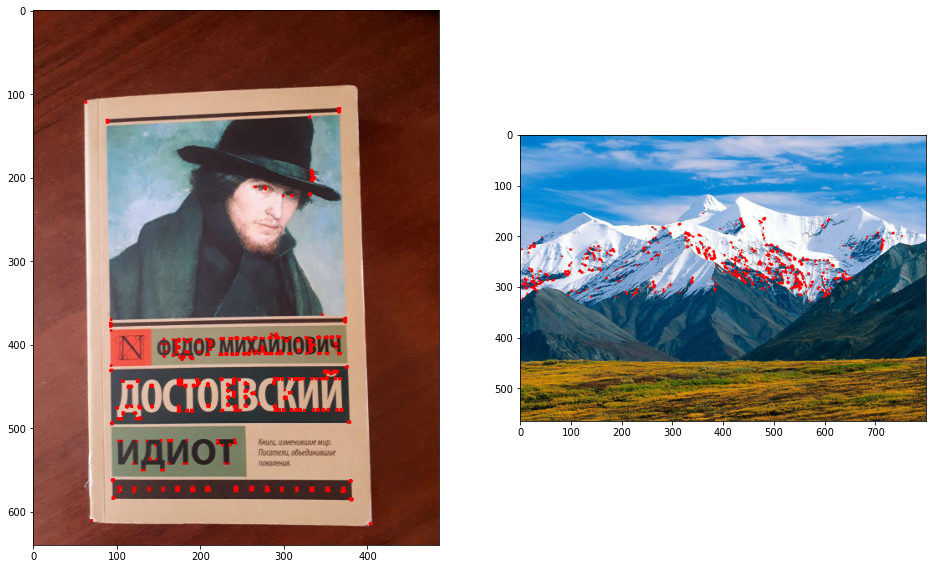

In [7]:
def harris(img, k = 0.04):
  # convert image to a grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # smoothen the image
  gray = cv2.GaussianBlur(gray, (3,3), 0)
  
  # find derivatives
  Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
  Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
  Ixx = Ix**2
  Ixy = Iy*Ix
  Iyy = Iy**2

  # Harris response calculation, remember to account for the window size!
  # Only use full sized windows!
  corners = np.zeros((gray.shape))
  
  height, width = gray.shape
  w_size = 3
  offset = int(w_size/2)
  
  
  for y in range(offset, height-offset):
      for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+offset+1,x-offset:x+offset+1])
        Syy = np.sum(Iyy[y-offset:y+offset+1,x-offset:x+offset+1])
        Sxy = np.sum(Ixy[y-offset:y+offset+1,x-offset:x+offset+1])

        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        r = det - k*(trace**2)
        
        corners[y,x] = r

  # Dilate responses to make them more visible
  dest = cv2.dilate(corners, None) 

  # Color pixels in the original image red, where
  # the Harris response is above a given threshold
  output = img.copy()
  output[dest > 0.1 * dest.max()]=[255, 0, 0] 

  return output

def harris_conv(img, k = 0.04):
  # convert image to a grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # smoothen the image
  gray = cv2.GaussianBlur(gray, (3,3), 0)
  
  # find derivatives
  Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
  Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
  Ixx = Ix**2
  Ixy = Iy*Ix
  Iyy = Iy**2

  # Harris response calculation, remember to account for the window size!
  # Only use full sized windows!
  # This time we are doing the summation over the window using a box filter
  w_size = 3
  kernel = np.ones([w_size, w_size])
  Sxx = cv2.filter2D(Ixx, cv2.CV_64F, kernel)
  Syy = cv2.filter2D(Iyy, cv2.CV_64F, kernel)
  Sxy = cv2.filter2D(Ixy, cv2.CV_64F, kernel)
  determinants = Sxx * Syy - (Sxy**2)
  traces = Sxx + Syy
  corners = determinants -  k * (traces**2)

  # Dilate responses to make them more visible
  dest = cv2.dilate(corners, None) 

  # Color pixels in the original image red, where
  # the Harris response is above a given threshold
  output = img.copy()
  output[dest > 0.1 * dest.max()]=[255, 0, 0] 

  return output
  
# CHECK YOUR IMPLEMENTATION
book_img = read_and_resize('book.jpg')
mountains_img = read_and_resize('mountains.jpg')

#showInRow([book_img, mountains_img])

books_img_c = harris(book_img, k = 0.04)
mountains_img_c = harris(mountains_img, k = 0.04)
      
showInRow([books_img_c, mountains_img_c])

books_img_c2 = harris_conv(book_img, k = 0.04)
mountains_img_c2 = harris_conv(mountains_img, k = 0.04)
      
showInRow([books_img_c2, mountains_img_c2])

In [8]:
def harris_conv(img, k = 0.04):
  # convert image to a grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # smoothen the image
  gray = cv2.GaussianBlur(gray, (3,3), 0)
  
  # find derivatives
  Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
  Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
  Ixx = Ix**2
  Ixy = Iy*Ix
  Iyy = Iy**2

  # Harris response calculation, remember to account for the window size!
  # Only use full sized windows!
  # This time we are doing the summation over the window using a box filter
  w_size = 3
  kernel = np.ones([w_size, w_size])
  Sxx = cv2.filter2D(Ixx, cv2.CV_64F, kernel)
  Syy = cv2.filter2D(Iyy, cv2.CV_64F, kernel)
  Sxy = cv2.filter2D(Ixy, cv2.CV_64F, kernel)
  determinants = Sxx * Syy - (Sxy**2)
  traces = Sxx + Syy
  corners = determinants -  k * (traces**2)

  # Dilate responses to make them more visible
  dest = cv2.dilate(corners, None) 

  # Color pixels in the original image red, where
  # the Harris response is above a given threshold
  output = img.copy()
  output[dest > 0.1 * dest.max()]=[255, 0, 0] 

  return output

## SIFT

Number of key points: <class 'cv2.KeyPoint'>
Key point type is: <class 'cv2.KeyPoint'>


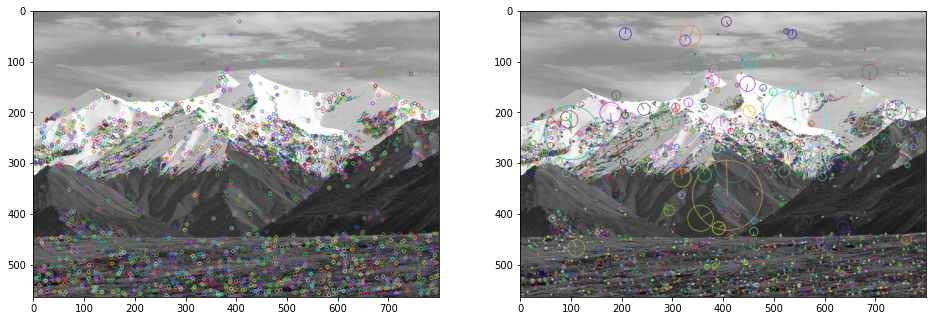

In [9]:
mountains_img = read_and_resize('mountains.jpg')
img = mountains_img.copy()

gray= cv2.cvtColor(mountains_img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

print(f'Number of key points: {type(kp[0])}')
print(f'Key point type is: {type(kp[0])}')
gray2 = gray.copy()
img2 = img.copy()

img=cv2.drawKeypoints(gray,kp,img)
img2=cv2.drawKeypoints(gray2,kp,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

showInRow([img, img2])

**cv2.KeyPoint** attributes:

angle
 
octave - octave (pyramid layer) from which the keypoint has been extracted
 
pt - coordinates of the keypoints
 
response - the response by which the most strong keypoints have been selected.
 
size - diameter of the meaningful keypoint neighborhood



## SIFT usage

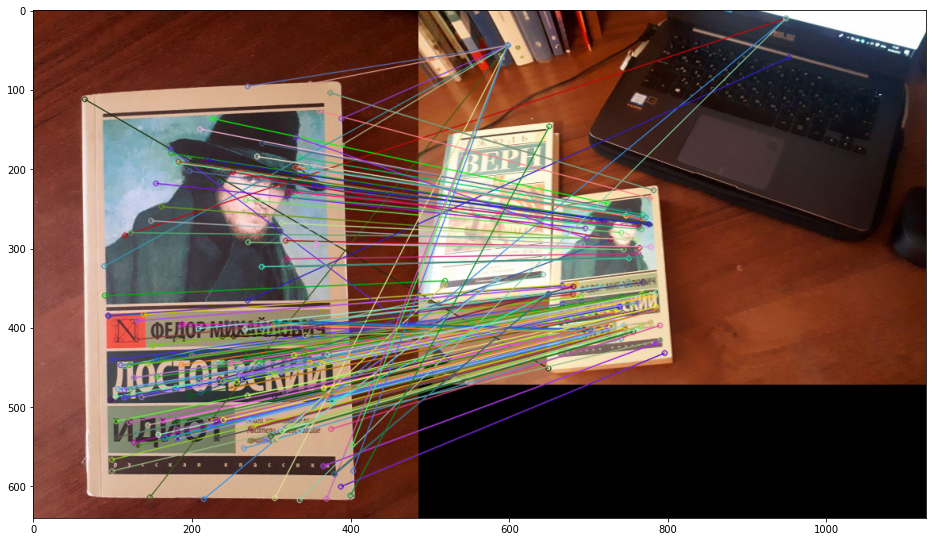

(<matplotlib.image.AxesImage at 0x7fe00eb73810>, None)

In [10]:
mouse = read_and_resize('book.jpg', 0)
scene = read_and_resize('book_scene.jpg', 0)

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(mouse,None)
kp2, des2 = sift.detectAndCompute(scene,None)

# BFMatcher (brute force) with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects a list of lists as matches.
img3 = cv2.drawMatchesKnn(mouse,kp1,scene,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

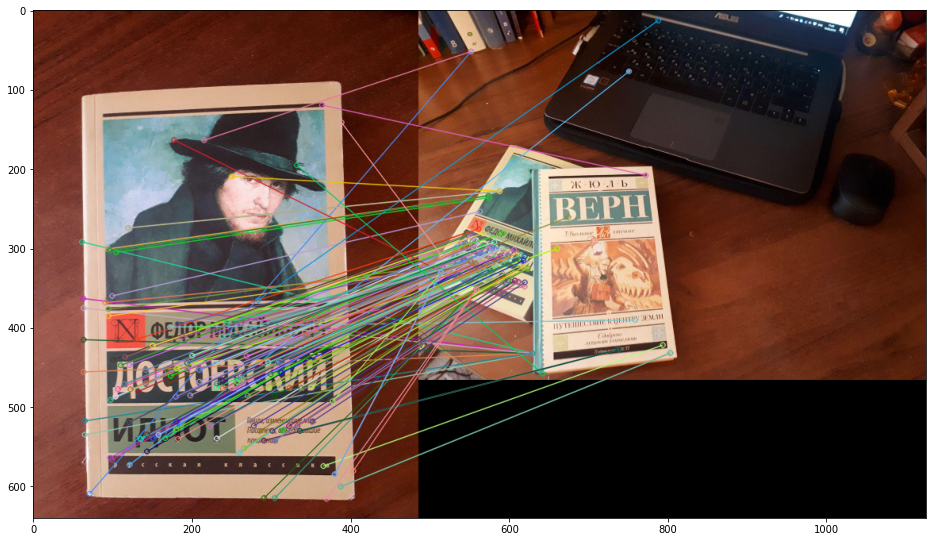

(<matplotlib.image.AxesImage at 0x7fe00eb07b10>, None)

In [11]:
mouse = read_and_resize('book.jpg', 0)
scene = read_and_resize('book_scene_2.jpg', 0)

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(mouse,None)
kp2, des2 = sift.detectAndCompute(scene,None)


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(mouse,kp1,scene,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

## One more example

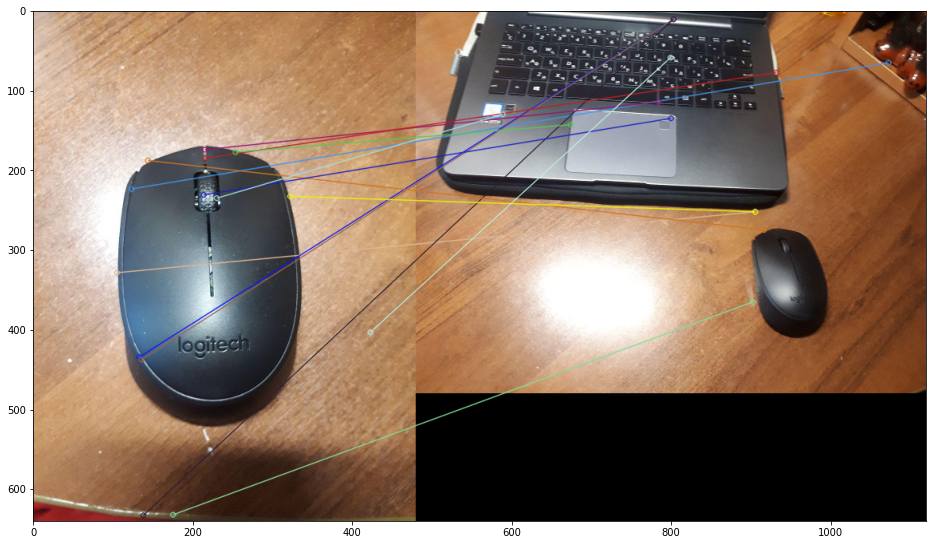

(<matplotlib.image.AxesImage at 0x7fe00eaefcd0>, None)

In [12]:
mouse = read_and_resize('mouse.jpg', 0)
scene = read_and_resize('mouse_scene.jpg', 0)

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(mouse,None)
kp2, des2 = sift.detectAndCompute(scene,None)


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(mouse,kp1,scene,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

## Panoramas creating using SIFT

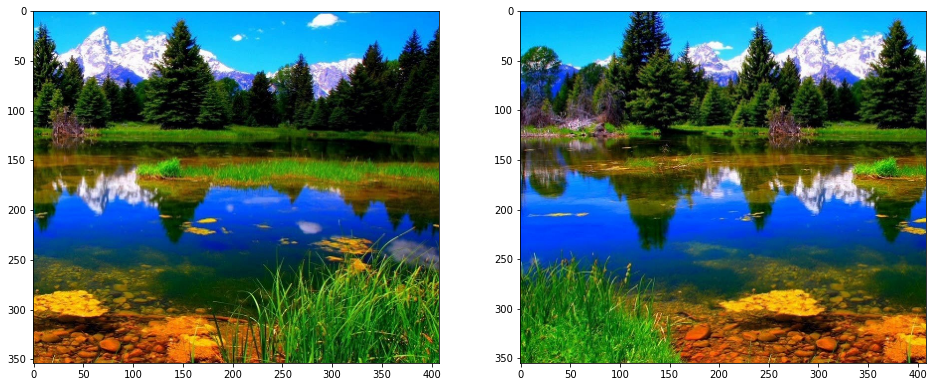

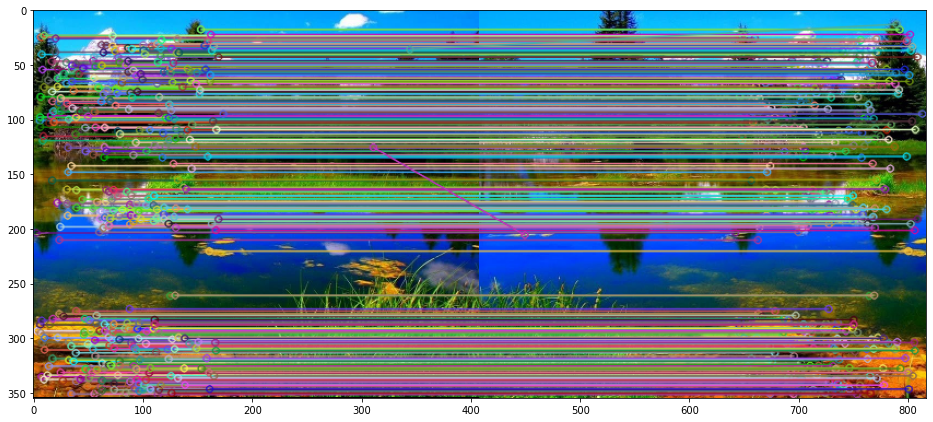

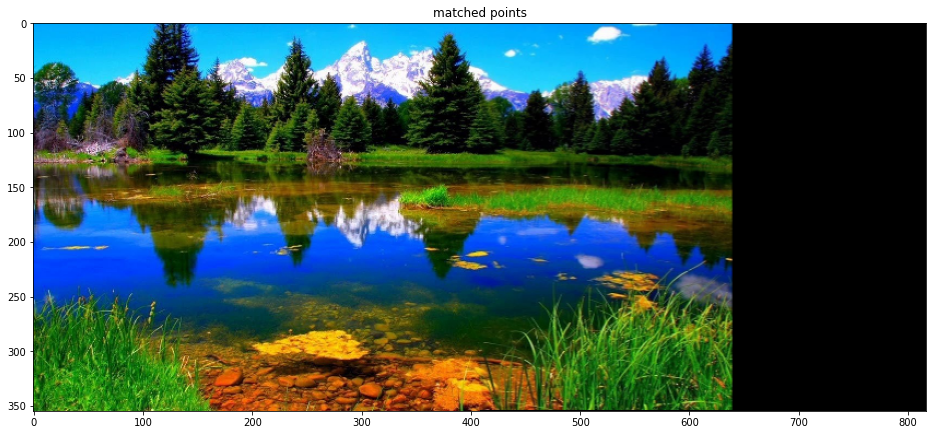

(<matplotlib.image.AxesImage at 0x7fe00c879290>,
 Text(0.5, 1.0, 'matched points'),
 None)

In [13]:
scene1 = read_and_resize('panorama2.jpg', 0)
scene2 = read_and_resize('panorama1.jpg', 0)

showInRow([scene1, scene2])

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kpsA, featuresA = sift.detectAndCompute(scene1,None)
kpsB, featuresB = sift.detectAndCompute(scene2,None)

# MATCH KEY POINTS
bf = cv2.BFMatcher()
matches = bf.knnMatch(featuresA,featuresB, k=2)

# Apply ratio test
good = []
good_matches = []
for m in matches:
  if len(m) == 2 and m[0].distance < m[1].distance * 0.7:
    good_matches.append((m[0].queryIdx, m[0].trainIdx))
    good.append([m[0]])

img3 = cv2.drawMatchesKnn(scene1,kpsA,scene2,kpsB,good,None,flags=2)
plt.imshow(img3),plt.show()    

kpsA = np.float32([kp.pt for kp in kpsA])
kpsB = np.float32([kp.pt for kp in kpsB])

# We can compute the homography only when we have more than 4 points
if len(good_matches) > 4:
  ptsA = np.float32([kpsA[i] for (i, _) in good_matches])
  ptsB = np.float32([kpsB[i] for (_, i) in good_matches])
  
  H, status = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,  4.0)
        
# sew together
result = cv2.warpPerspective(scene1, H,(scene1.shape[1] + scene2.shape[1], max(scene1.shape[0],scene2.shape[0])))
result[0:scene2.shape[0], 0:scene2.shape[1]] = scene2

plt.imshow(result),plt.title('matched points'), plt.show()

## Object detection using sift

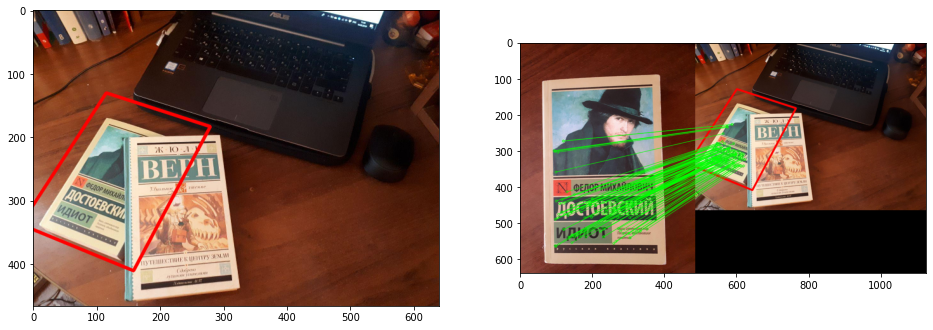

In [14]:
mouse = read_and_resize('book.jpg', 0)
scene = read_and_resize('book_scene_2.jpg', 0)

MIN_MATCH_COUNT = 10

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(mouse,None)
kp2, des2 = sift.detectAndCompute(scene,None)


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)


if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    # findHomography returns a mask that tells us, which point pairs did not pass the RANSAC filter
    matchesMask = mask.ravel().tolist()

    h,w,c = mouse.shape
    # Take corners of the first image and transform them onto the second image
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    scene = cv2.polylines(scene,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print ("Not enough matches were found, only %d. Needed: %d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(mouse,kp1,scene,kp2,good,None,**draw_params)

showInRow([scene, img3])

## References

harris corner detector [link](https://muthu.co/harris-corner-detector-implementation-in-python/)

SIFT [link](https://docs.opencv.org/trunk/da/df5/tutorial_py_sift_intro.html)

SIFT Python Implementation [link](https://medium.com/@lerner98/implementing-sift-in-python-36c619df7945)

Panoramas [link](https://www.pyimagesearch.com/2016/01/11/opencv-panorama-stitching/)

Object detection with SIFT [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html)